#### ML Modeling - For Classification 
#### Titanic Data Set - through Decision Tree and Random Forest classifier and Logistic regression

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.

[![https://raw.githubusercontent.com/rabindragoswami/DataScience/master/27302.jpg](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/27302.jpg "https://raw.githubusercontent.com/rabindragoswami/DataScience/master/27302.jpg")](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/27302.jpg "https://raw.githubusercontent.com/rabindragoswami/DataScience/master/27302.jpg")

RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.

### Table of Content:
- Load the Data Set
- Describe Data Set
- Fix null values
- Feature Engineering
- Data Exploration
- Dumies-Onehot encoding
- Split data into Train and Test
- Initiate Model -Decision Tree
		Fit data into Decision Tree
		canculate accuracy score 
		Confunsion Metrics
Initiate Model -Random Forest 
		Fit data into Decision Tree
		canculate accuracy score 
		Confunsion Metrics
- Conclusion - Compare both model
- Split Test and Train data set



### Import libraries and Load the Data Set

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

### Load the Data Set

In [37]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv") 

##### Describe the Data Set

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

In [41]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [39]:
titanic_data =titanic_data.drop(columns= ['Name','Ticket','Cabin'], axis = 1)

In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Check the Null Values

In [42]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

There are 177 records where Age is null and 2 records of Emberked having null values.Since age is flot we can get it's median 
value. And for EMberked also we ill get median since it is object

In [43]:
median_age = titanic_data.Age.median()
Embarked_mode = titanic_data.Embarked.mode()[0]
print(Embarked_mode)

S


In [44]:
print("the median age {0} and mode eberked is {1} ".format(median_age,Embarked_mode))

the median age 28.0 and mode eberked is S 


replace null values with respective mean and mode 

In [45]:
titanic_data.Age.fillna(median_age,inplace=True)

In [46]:
titanic_data.Embarked.fillna(Embarked_mode,inplace = True)

In [47]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Feature ENgineering

Lets create one more column for Child 

In [48]:
titanic_data['Gender'] = titanic_data.apply(lambda x: "Child" if x['Age']<15 else x['Sex'], axis = 1)

In [50]:
titanic_data[titanic_data['Age']<15].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
7,8,0,3,male,2.0,3,1,21.0750,S,Child
9,10,1,2,female,14.0,1,0,30.0708,C,Child
10,11,1,3,female,4.0,1,1,16.7000,S,Child
14,15,0,3,female,14.0,0,0,7.8542,S,Child
16,17,0,3,male,2.0,4,1,29.1250,Q,Child


we can crate one more feature Family size, which is sum of SinnSp and Parch and plus 1. And delete these two column. Also delete Passenger id which have no use

In [51]:
titanic_data['FamiltSize'] = titanic_data['SibSp'] + titanic_data['Parch'] +1

In [52]:
titanic_data = titanic_data.drop (columns = ['PassengerId','SibSp','Parch'], axis =1)

In [55]:
titanic_data = titanic_data.drop(['Sex'], axis =1)

In [56]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Embarked,Gender,FamiltSize
0,0,3,22.0,7.2500,S,male,2
1,1,1,38.0,71.2833,C,female,2
2,1,3,26.0,7.9250,S,female,1
3,1,1,35.0,53.1000,S,female,2
4,0,3,35.0,8.0500,S,male,1


In [60]:
titanic_data.to_csv('titanic_data_Processed.csv',index = False)

#### Data Exploration

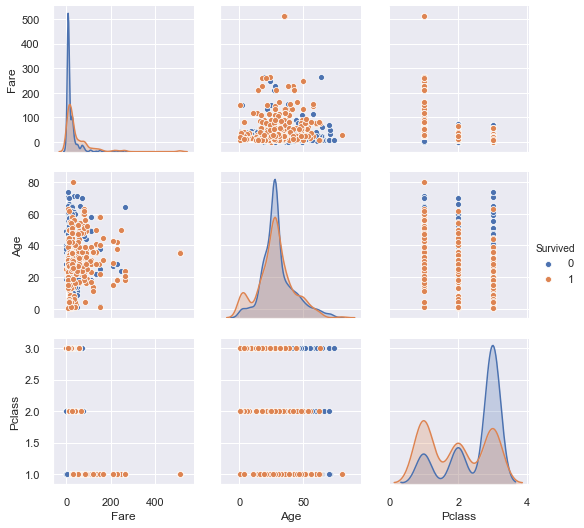

In [71]:
sns.pairplot(titanic_data,vars = ["Fare","Age","Pclass"],hue ='Survived',kind='scatter')


Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268EEBE0F98>],
      dtype=object)

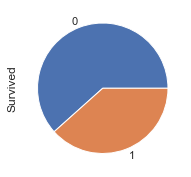

In [86]:
titanic_data['Survived'].value_counts().plot(kind = 'pie',subplots=True, figsize=(6, 3))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268EEC109B0>],
      dtype=object)

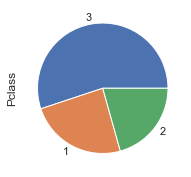

In [87]:
titanic_data['Pclass'].value_counts().plot(kind = 'pie',subplots=True, figsize=(6, 3))


 - Passenger class 3 was more number of people since less fare

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268ECDA2FD0>],
      dtype=object)

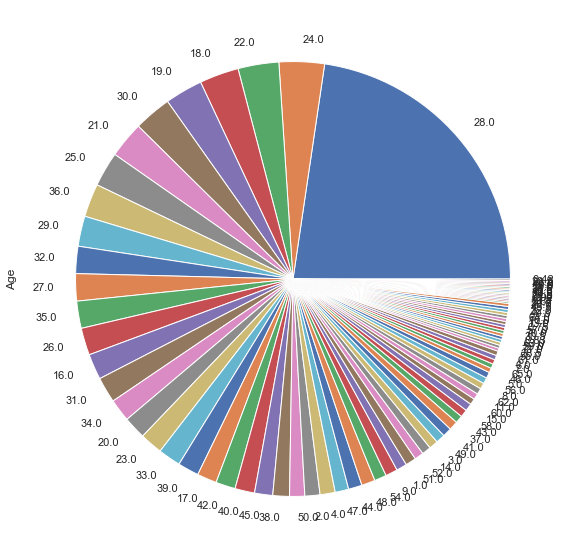

In [93]:
titanic_data['Age'].value_counts().plot(kind = 'pie',subplots=True, figsize=(25, 10))

lets create the dumy for Embarked , sinec we have object there. we can one hot encodder

In [94]:
titanic_data = pd.get_dummies(titanic_data,columns = ['Embarked','Gender'],drop_first =True)

In [95]:
titanic_data.head()

,Survived,Pclass,Age,Fare,FamiltSize,Embarked_Q,Embarked_S,Gender_female,Gender_male
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,0,0,1,0
2,1,3,26.0,7.9250,1,0,1,1,0
3,1,1,35.0,53.1000,2,0,1,1,0
4,0,3,35.0,8.0500,1,0,1,0,1


In [99]:
titanic_data.to_csv('titanic_data_Processed_dummy.csv')

 - Create Test and Train Data

In [ ]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

In [101]:
X = titanic_data.loc[:,titanic_data.columns!='Survived']

In [102]:
y= titanic_data.Survived

In [105]:
X.head(2)

,Pclass,Age,Fare,FamiltSize,Embarked_Q,Embarked_S,Gender_female,Gender_male
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,0,0,1,0


In [106]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

#### Import Model and Fit the Data

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [114]:
from sklearn.tree  import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 0)

In [115]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [122]:
y_pred_train = model_dt.predict(X_train)

In [123]:
y_pred_test = model_dt.predict(X_test)

#### Calculate Accuracy Score

In [126]:
from sklearn.metrics import accuracy_score

print("model accuracy for train is  {1} and for test is  {0}".format(accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))

model accuracy for train is  0.9873595505617978 and for test is  0.7877094972067039


#### Confusion Metrics

[![Confusion Metrics](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/confusion_metrics.jpg "Confusion Metrics")](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/confusion_metrics.jpg "Confusion Metrics")

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
confusion_matrix.columns = ['Predcited_Died','Predcited_Survived']
confusion_matrix.index = ['Actual_Died','Actual_Survived']
print(confusion_matrix)

                 Predcited_Died  Predcited_Survived
Actual_Died                  92                  14
Actual_Survived              24                  49


In [178]:
def model_score(ytest,ypredtest):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    Accuracy = accuracy_score(ytest,ypredtest)
    precision = precision_score(ytest,ypredtest)
    recall = recall_score(ytest,ypredtest)
    F1_Score = f1_score(ytest,ypredtest)
    print(" Accuracy is {0} precision is {1}  Recall is {2}  F1_Score is {3}".format(Accuracy,precision,recall,F1_Score))

##### Calculate Manually to validate Function

- This means total correct prediction is 92 +49 = 141 and wrong prediction is 48
- Precision = (TP)/(TP+FP) = 49/(49+14) = 49/63 = 0.777
- Call Back  = TP/(TP+FN) = 49/(49+24) = 49/73 = 0.671
- Accuracy = TP+TN/Sample Size = 92+49 /179 = 141/179 = 0.787
- F1 Score = 2*Precision*Callbacl /Precision + Call Back = 2 *0.777*0.671 / 0.777+0.671 = 1.04273/1.448 =0.720


In [180]:
model_score(y_test,y_pred_test)

 Accuracy is 0.7877094972067039 precision is 0.7777777777777778  Recall is 0.6712328767123288  F1_Score is 0.7205882352941178


### RandomForestClassifier

Random Forest is considered to be the panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

In Random Forest, we grow multiple trees as opposed to a single tree in CART model . To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

In [135]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
y_test_pred_rfc = model_rfc.predict(X_test)
y_train_pred_rfc = model_rfc.predict(X_train)

### Model Evaluation

In [147]:
def confusion_matrix(test,pred_test):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = pd.DataFrame(confusion_matrix(test,pred_test))
    confusion_matrix.columns = ['predicted_dead','predictes_survived']
    confusion_matrix.index = ['Actual_dead','Actual_Survived']
    print(confusion_matrix)

In [148]:
confusion_matrix(y_test,y_test_pred_rfc)

                 predicted_dead  predictes_survived
Actual_dead                  93                  13
Actual_Survived              27                  46


In [179]:
model_score(y_test,y_test_pred_rfc)

 Accuracy is 0.776536312849162 precision is 0.7796610169491526  Recall is 0.6301369863013698  F1_Score is 0.6969696969696969


### Logisticregression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__


In [158]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_test_pred_logic = model_logistic.predict(X_test)

### Model Evaluation

In [161]:
confusion_matrix(y_test,y_test_pred_logic)

                 predicted_dead  predictes_survived
Actual_dead                  95                  11
Actual_Survived              26                  47


In [181]:
model_score(y_test,y_test_pred_logic)

 Accuracy is 0.7932960893854749 precision is 0.8103448275862069  Recall is 0.6438356164383562  F1_Score is 0.7175572519083969


### Support Vector Machine - SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [186]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [190]:
y_test_pred_SVC = clf.predict(X_test)

In [191]:
confusion_matrix(y_test,y_test_pred_SVC)

                 predicted_dead  predictes_survived
Actual_dead                  89                  17
Actual_Survived              32                  41


In [193]:
model_score(y_test,y_test_pred_SVC)

 Accuracy is 0.7262569832402235 precision is 0.7068965517241379  Recall is 0.5616438356164384  F1_Score is 0.6259541984732825


### Conclusion
 - After comparing all three model's score - logistic regression found more fit than others for the current data set

|   |  Accuracy | Precision  | Recall  |   F1_Score|
| :------------ | :------------ | :------------ | :------------ | :------------ |
|  Decision Tree |  0.787 |  0.777 | 0.671  |  0.720 |
| Random Forest  | 0.776  |0.779   | 0.630  |  0.696 |
|  Logistic Regression | 0.793  |  0.810 | 0.643  |0.717   |   |
|  SVC | 0.726  |  0.706 | 0.561  |0.625   |   |


## Thank You !!